In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [14]:
def embed(lst, dim):
    emb = np.empty((0, dim), float)
    for i in range(lst.size - dim + 1):
        tmp = np.array(lst[i : i + dim])[::-1].reshape((1, -1))
        emb = np.append(emb, tmp, axis=0)
    return emb

In [15]:
lst = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
dim = 3
train = embed(lst, dim)

print(train)

[[3. 2. 1.]
 [4. 3. 2.]
 [5. 4. 3.]
 [6. 5. 4.]
 [7. 6. 5.]
 [8. 7. 6.]
 [9. 8. 7.]]


In [16]:
test = np.array([9,8,7,6,5,4,3,2,1])
test = embed(test, dim)

neigh = NearestNeighbors(
        n_neighbors=1
    )
neigh.fit(train)
d, ind = neigh.kneighbors(test)

print(d)
print(ind)

[[2.82842712]
 [2.82842712]
 [2.82842712]
 [2.82842712]
 [2.82842712]
 [2.82842712]
 [2.82842712]]
[[6]
 [5]
 [4]
 [3]
 [2]
 [1]
 [0]]


/Users/dongwei/opt/anaconda3/envs/tf_1_8_py3_6/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


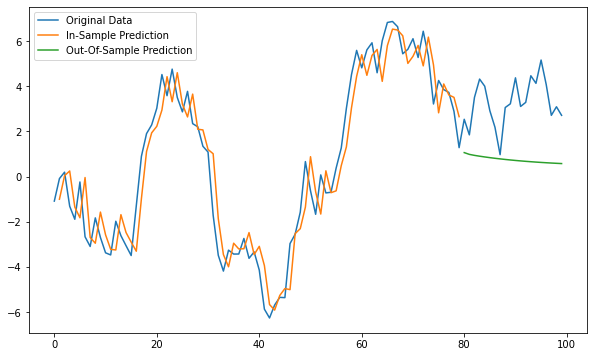

In [17]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 创建示例时间序列数据
np.random.seed(123)
data = np.cumsum(np.random.randn(100))  # 生成随机时间序列数据

# 拆分数据集
train_data = data[:80]  # 前80个数据点作为训练集
test_data = data[80:]   # 后20个数据点作为测试集

# 构建并训练ARMA模型
arma_model = sm.tsa.ARMA(train_data, (3, 0)).fit()

# 样本内预测
in_sample_pred = arma_model.predict(start=1, end=79, typ='levels')

# 样本外预测
out_of_sample_pred = arma_model.predict(start=80, end=99, typ='levels')

# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(data, label='Original Data')
plt.plot(np.arange(1, 80), in_sample_pred, label='In-Sample Prediction')
plt.plot(np.arange(80, 100), out_of_sample_pred, label='Out-Of-Sample Prediction')
plt.legend()
plt.show()
